In [1]:
import pandas as pd

In [2]:
user_data = pd.read_csv("C://123/usr/Karpov/Data_Analytics/3/Задания/Минипроект/user_data.csv")
user_data

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [3]:
logs = pd.read_csv("C://123/usr/Karpov/Data_Analytics/3/Задания/Минипроект/logs.csv")
logs

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


In [4]:
user_data.isna().sum()

client     0
premium    0
age        0
dtype: int64

In [5]:
logs.isna().sum()

client      0
success     0
platform    0
time        0
dtype: int64

In [6]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [7]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [8]:
full_data = user_data.merge(logs, how='outer', on='client')
full_data

,client,premium,age,success,platform,time
0,46346,False,58.0,True,phone,1585452839
1,4391,False,55.0,False,phone,1585409861
2,27372,False,64.0,False,phone,1585446018
3,11989,False,44.0,True,computer,1585403698
4,60664,False,49.0,True,phone,1585406918
...,...,...,...,...,...,...
4495,50,NaN,NaN,True,tablet,1585412688
4496,68031,NaN,NaN,True,computer,1585464203
4497,39878,NaN,NaN,False,phone,1585412838
4498,73299,NaN,NaN,True,phone,1585458370


In [9]:
full_data.nunique()

client      4011
premium        2
age           50
success        2
platform       3
time        4376
dtype: int64

In [10]:
full_data.query('success == True') \
         .groupby('client', as_index = False) \
         .agg({'platform':"count"}) \
         .sort_values(by=['platform'], ascending = False)

,client,platform
332,12179,41
1758,61468,41
1487,52870,41
1759,61473,41
2626,92584,41
...,...,...
956,34121,1
957,34191,1
958,34198,1
959,34277,1


In [11]:
maximum_success = full_data.query('success == True') \
         .groupby('client', as_index = False) \
         .agg({'platform':"count"}) \
         .sort_values(by=['platform'], ascending = False).platform.max()

In [12]:
maximum_success

41

In [13]:
max_suc = full_data.query('success == True') \
         .groupby('client', as_index = False) \
         .agg({'platform':"count"}) \
         .sort_values(by=['platform'], ascending = False)
max_suc

,client,platform
332,12179,41
1758,61468,41
1487,52870,41
1759,61473,41
2626,92584,41
...,...,...
956,34121,1
957,34191,1
958,34198,1
959,34277,1


In [14]:
max_suc.query('platform == @maximum_success')  # Экранируем переменную

,client,platform
332,12179,41
1758,61468,41
1487,52870,41
1759,61473,41
2626,92584,41
2345,82563,41
2231,78349,41
1020,36165,41
810,28719,41


In [15]:
suc_clients = max_suc.query('platform == @maximum_success').sort_values(by=['client']).client.tolist()

In [16]:
suc_clients

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

In [17]:
', '.join([str(client) for client in suc_clients])

'12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584'

In [18]:
q = ', '.join([str(client) for client in suc_clients])

In [19]:
q

'12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584'

In [20]:
max_suc2 = full_data \
         .groupby('client', as_index = False) \
         .agg({'success':"sum"}) \
         .rename(columns={'success':"success_number"}) \
         .sort_values(by=['success_number'], ascending = False)
max_suc

,client,platform
332,12179,41
1758,61468,41
1487,52870,41
1759,61473,41
2626,92584,41
...,...,...
956,34121,1
957,34191,1
958,34198,1
959,34277,1


С какой платформы осуществляется наибольшее количество успешных операций?


In [21]:
full_data.groupby('platform').sum()

,client,age,success,time
platform,,,,
computer,76262075,50402.0,1090,2386087494404
phone,141202125,93460.0,2019,4364718383638
tablet,12030211,8219.0,180,383675988151


Какую платформу предпочитают премиумные клиенты?


In [22]:
full_data.query("premium == True").groupby('platform').sum()

,client,age,success,time
platform,,,,
computer,7675512,6778.0,108,237815994203
phone,12336014,10949.0,177,390018434144
tablet,1103533,977.0,18,38050497388


In [23]:
full_data.query('premium == True').platform.value_counts()

phone       246
computer    150
tablet       24
Name: platform, dtype: int64

Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)


In [24]:
import seaborn as sns

C:\Users\Nikolay\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

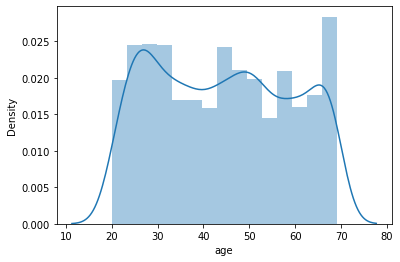

In [25]:
sns.distplot(full_data.age)

C:\Users\Nikolay\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Nikolay\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

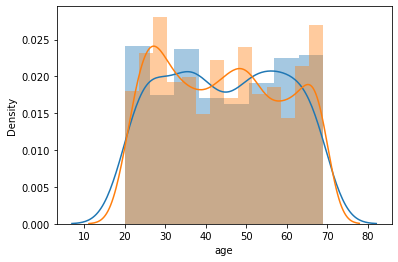

In [26]:
sns.distplot(full_data.query('premium == True').age)
sns.distplot(full_data.query('premium == False').age)

In [27]:
import matplotlib.pyplot as plt

C:\Users\Nikolay\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Nikolay\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

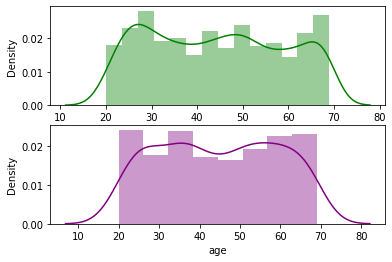

In [34]:
fig, ax = plt.subplots(nrows=2, ncols=1)  # subplot для 2х графиков

sns.distplot(full_data.query('premium == False').age, ax = ax[0], color = 'green')   # ax[0] 
sns.distplot(full_data.query('premium == True').age, ax = ax[1], color = 'purple')

Постройте график распределения числа успешных операций
<br>x – число успешных операций
<br>y – число клиентов, совершивших такое количество успешных операций


In [58]:
full_data.groupby('client', as_index = True) \
        .agg({'success':'sum'})

,success
client,
40,1
50,1
75,1
81,1
132,1
...,...
99927,1
99931,1
99952,0


In [64]:
df_for_plot = full_data.groupby('client', as_index = True) \
        .agg({'success':'sum'})

C:\Users\Nikolay\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

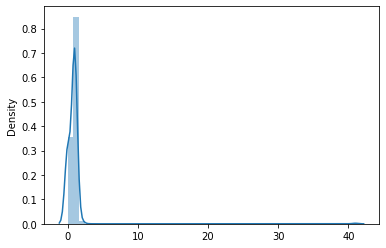

In [65]:
sns.distplot(df_for_plot)

In [66]:
df_for_plot.success.value_counts()

1     2791
0     1166
2       43
41       9
40       1
3        1
Name: success, dtype: int64

⭐️Задание со звёздочкой!⭐️

Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot. По оси x – возраст, по оси y – число успешных операций. Если размер графика получается небольшим, можно добавить plt.figure(figsize=(12, 8)) в начало соответствующей ячейки. 

In [95]:
full_data.query('platform == "computer"').groupby('age', as_index=False).agg({'success':"count"})

,age,success
0,20.0,19
1,21.0,20
2,22.0,12
3,23.0,17
4,24.0,28
5,25.0,38
6,26.0,22
7,27.0,23
8,28.0,54
9,29.0,25


In [96]:
df_for_plot = full_data.query('platform == "computer"').groupby('age', as_index=False).agg({'success':"count"})

<AxesSubplot:xlabel='age', ylabel='success'>

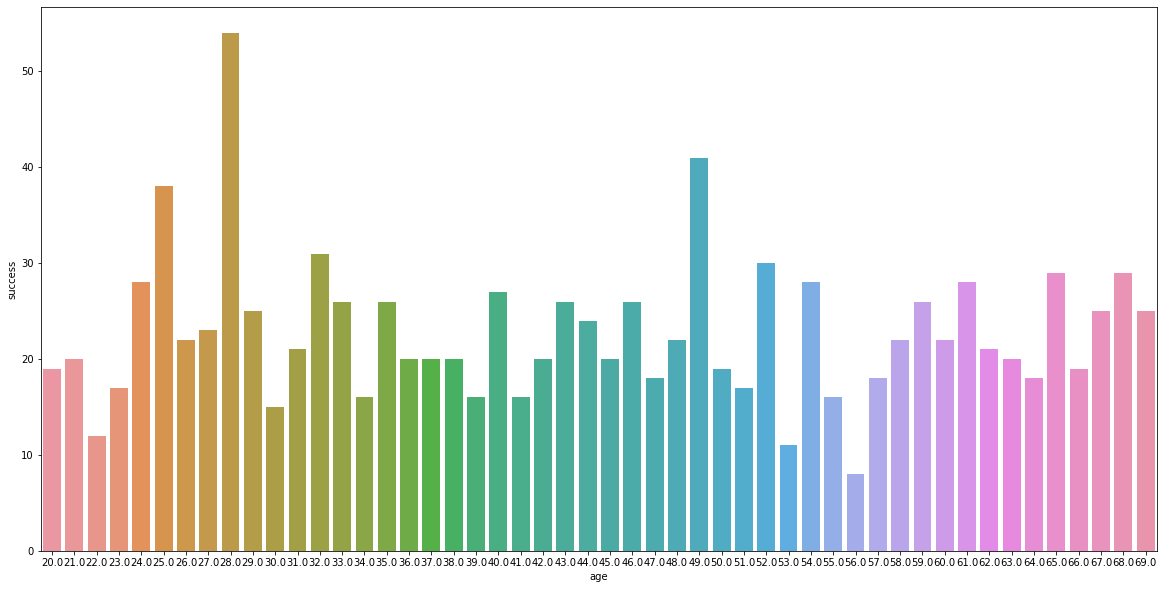

In [107]:
plt.figure(figsize=(20,10))
sns.barplot(x=df_for_plot.age, y = df_for_plot.success)

In [108]:
full_data.query('platform == "computer" and success == True')

,client,premium,age,success,platform,time
3,11989,False,44.0,True,computer,1585403698
12,32406,False,24.0,True,computer,1585479382
14,62404,False,40.0,True,computer,1585430097
20,68848,False,35.0,True,computer,1585440553
26,49675,False,48.0,True,computer,1585402108
...,...,...,...,...,...,...
4482,33732,NaN,NaN,True,computer,1585458839
4483,20398,NaN,NaN,True,computer,1585459318
4489,13373,NaN,NaN,True,computer,1585433117
4493,95135,NaN,NaN,True,computer,1585456336


In [111]:
df_for_count = full_data.query('platform == "computer" and success == True')

C:\Users\Nikolay\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='count'>

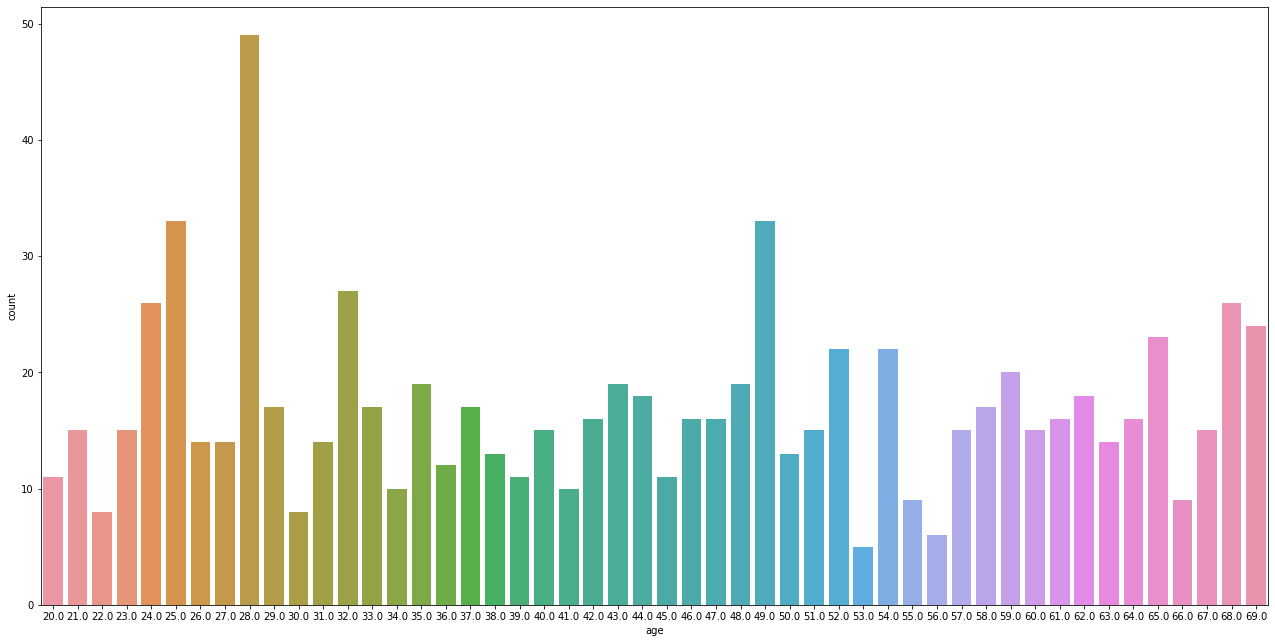

In [115]:
plt.figure(figsize=(22,11))
sns.countplot(df_for_count.age)